Выполнила: Владимирова Юлия 3822Б1ПР2

# Численное вычисление интеграла (Вариант 3)

Используя интеграл
$$-\frac{4}{9} = \int_0^1\sqrt[]{x}ln{x} dx$$
необходимо найти приблежение к $-\frac{4}{9}$ 


## Построение графика

Начнем с построения графика данного интеграла

Подключение библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

Создание Графика

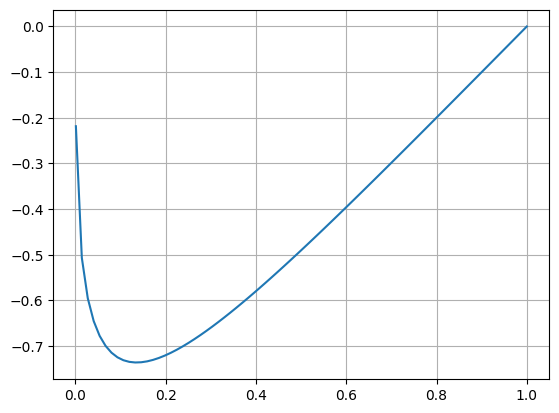

In [2]:
x = np.linspace(1e-3, 1, 77)
y = np.log(x)*(x**(0.5))
plt.plot(x, y)
plt.grid()

## Правило прямоугольников
Правило прямоугольников — метод численного интегрирования, заключающийся в разбиении отрезка на части и суммировании площадей прямоугольников заключенных в эти части отрезка. Полученное число является приближенным значением интеграла.

### Правило правых прямоугольников

Формула
$$ I \approx \displaystyle\sum_{j=1}^{N}h*f(x_{j})$$

Правило правых прямоугольников: высотой (стороной) прямоугольника заключенного в часть отрезка считаем функцию от его (отрезка) конца, иначе говоря, его правой стороны.

In [3]:
result=[]
i=-4/9
pogr=[]
zn=[2, 4, 8, 16, 32, 64, 128]
print(f"кол-во узлов  | полученная погрешность")
print(f"--------------------------------------")

for u in [2, 4, 8, 16, 32, 64, 128]:
    h = 1/u #(1-0)=1
    x = np.arange(0 , 1, h)
    y =  (((x+h)**(0.5))*np.log(x+h))
    suma =h*sum(y)
    pogr.append(abs((suma)-i))
    print(f"  {str(u).ljust(11,' ')} | {pogr[-1]}")

print("\n Средняя погрешность ", sum(pogr)/7)
result.append(("Правило правых прямоугольников",sum(pogr)/7))


кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.1993799085773076
  4           | 0.08634038563174029
  8           | 0.03635440492493103
  16          | 0.014969859599072877
  32          | 0.006054958374678787
  64          | 0.0024137607835620356
  128         | 0.0009507895141901979

 Средняя погрешность  0.04949486677221183




**Изменение погрешности**

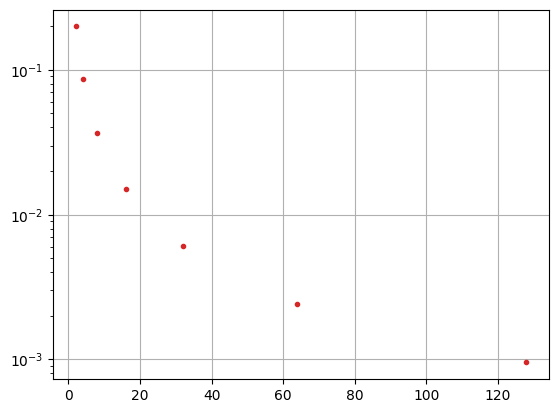

In [4]:
plt.plot(zn, pogr,'.',color='tab:red')
plt.yscale('log')
plt.grid()


### Правило средних прямоугольников

Формула
$$ I \approx \displaystyle\sum_{j=1}^{N}hf(\frac{ x_{j-1}+x_{j} }{ 2 })$$

Правило средних прямоугольников: высотой (стороной) прямоугольника заключенного в часть отрезка считаем функцию от середины отрезка.

In [5]:

pogr=[]
print(f"кол-во узлов  | полученная погрешность")
print(f"--------------------------------------")

for u in zn:
    h = 1/u  # (1-0)=1
    x = np.arange(0, 1, h)
    y =  (x+h/2)**(1/2)*np.log(x+h/2)
    suma =h*sum(y)
    pogr.append(abs((suma-i)))
    print(f"  {str(u).ljust(11,' ')} | {pogr[-1]}")
print("\n Средняя погрешность ", sum(pogr)/7)
result.append(("Правило средних прямоугольников",sum(pogr)/7))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.02669913731382706
  4           | 0.013631575781878014
  8           | 0.00641468572678533
  16          | 0.002859942849715136
  32          | 0.0012274368075549935
  64          | 0.0005121817551809738
  128         | 0.00020917394825931135

 Средняя погрешность  0.007364876311885831




**Изменение погрешности**

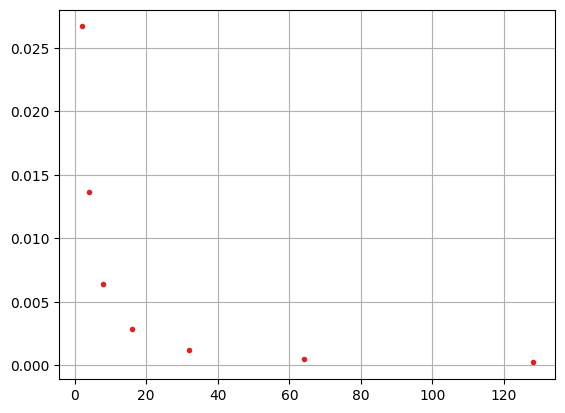

In [6]:
plt.plot(zn, pogr,'.',color='tab:red')
plt.grid()


### Правило левых прямоугольников

Формула
$$ I \approx \displaystyle\sum_{j=1}^{N}h*f(x_{j-1})$$

Правило левых прямоугольников: высотой (стороной) прямоугольника заключенного в часть отрезка считаем функцию от его начала отрезка, иначе говоря, его левой стороны.

Учитываем, что не можем взять логарифм от 0. 

In [7]:

pogr=[]
print(f"кол-во узлов  | полученная погрешность")
print(f"--------------------------------------")

for u in zn:
    h = 1/u  # (1-0)=1
    x = np.arange(1e-3, 1, h)
    y =  (x)**(1/2)*np.log(x)
    suma =h*sum(y)
    pogr.append(abs((suma-i)))
    print(f"  {str(u).ljust(11,' ')} | {pogr[-1]}")
print("\n Средняя погрешность ", sum(pogr)/7)
result.append(("Правило левых прямоугольников",sum(pogr)/7))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.09062087211172276
  4           | 0.032361804973471964
  8           | 0.009701570668927961
  16          | 0.001919460521075389
  32          | 0.00024701649620623156
  64          | 0.00055775830535848
  128         | 0.00038999905368408694

 Средняя погрешность  0.01939978316149241




**Изменение погрешности**

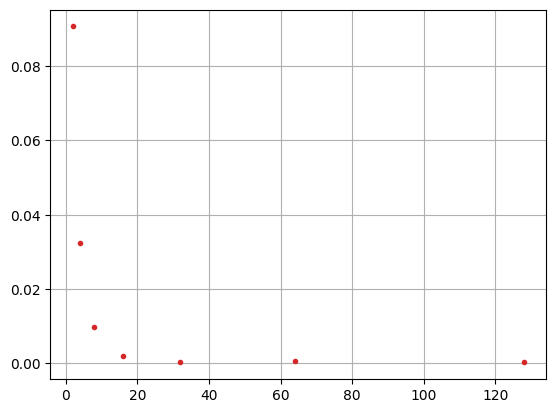

In [8]:
plt.plot(zn, pogr,'.',color='tab:red')
plt.grid()

## Правило трапеций


Формула
$$ I \approx \displaystyle\sum_{j=1}^{N}h*\frac{ f(x_{j-1})+f(x_{j}) }{ 2 }$$


Правило трапеций — метод численного интегрирования, заключающийся в разбиении отрезка на части и суммировании площадей прямоугольных трапеций заключенных в эти части отрезка, основания трапеции равны функции от начала части отрезка и функции от конца части отрезка (левая и правая части). Полученное число является приближенным значением интеграла.



In [9]:
pogr=[]
print(f"кол-во узлов  | полученная погрешность")
print(f"--------------------------------------")

for u in zn:
    h = 1/u  # (1-0)=1
    x = np.arange(1e-3, 1, h)
    y =  ((x)**(1/2)*np.log(x) + (x+h)**(1/2)*np.log(x+h))/2 
    suma =h*sum(y)
    pogr.append(abs((suma-i)))
    print(f"  {str(u).ljust(11,' ')} | {pogr[-1]}")
print("\n Средняя погрешность ", sum(pogr)/7)
result.append(("Правило трапеций",sum(pogr)/7))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.145481472602905
  4           | 0.059792105219063085
  8           | 0.023416720791723467
  16          | 0.008777035582473114
  32          | 0.0031817710344926864
  64          | 0.0011566354599909512
  128         | 0.00046719782899051765

 Средняя погрешность  0.03461041978851983




**Изменение погрешности**

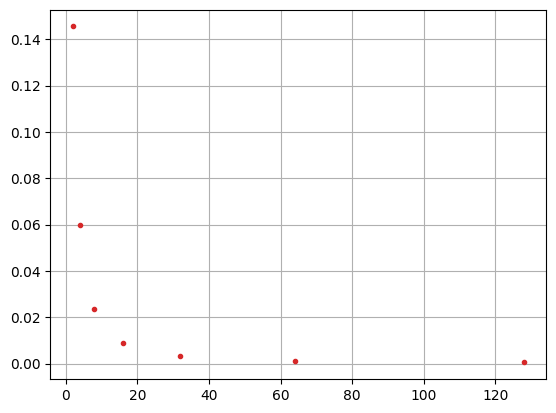

In [10]:
plt.plot(zn, pogr,'.',color='tab:red')
plt.grid()

## Правило Симпсона

Формула

$$ I \approx \displaystyle\frac{h}{3}\sum_{j=1,2}^{N-1}[f(x_{j-1})+4f(x_j)+f(x_{j+1})]$$

Правило Симпсона - или метод парабол, заключается в разбиении отрезка на части, к серединам которых проводится касательная-парабола, а затем вычисляется интеграл этой параболы на данной части отрезка. Сумма этих интегралов является приблизительным значением изначального интеграла.

In [11]:
pogr=[]
print(f"кол-во узлов  | полученная погрешность")
print(f"--------------------------------------")

for u in zn:
    h = 1/u #(1-0)=1
    x = np.linspace(1e-3, 1, u + 1)
    y = ((x)**(1/2))*np.log(x)
    par=integrate.simps(y)*h
    #print(par,' ',i-par, ' ', i)
    pogr.append(abs(i-par))
    print(f"  {str(u).ljust(11,' ')} | {pogr[-1]}")
print("\n Средняя погрешность ", sum(pogr)/7)
result.append(("Правило Симпсона",sum(pogr)/7))

кол-во узлов  | полученная погрешность
--------------------------------------
  2           | 0.0815927319214737
  4           | 0.03077009924255303
  8           | 0.01084051699306049
  16          | 0.003449561907668597
  32          | 0.0008705718188413147
  64          | 3.605804761341869e-05
  128         | 0.00020793577469274682

 Средняя погрешность  0.01825249652941476




**Изменение погрешности**

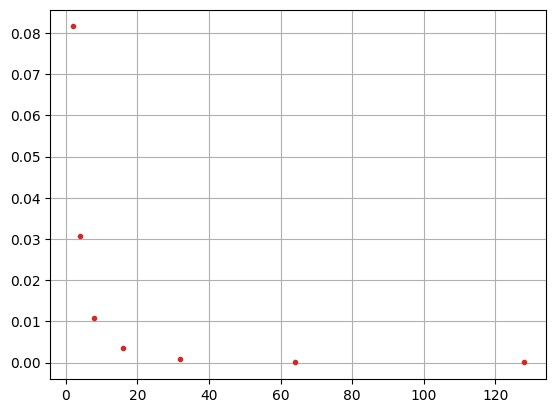

In [12]:
plt.plot(zn, pogr,'.',color='tab:red')
plt.grid()

##  Вывод



In [13]:
print("|         Метод                        | Полученная средняя погрешность|")
print("|--------------------------------------|-------------------------------|")
for i in sorted(result,key=lambda x: x[1]): print(f"|  {i[0].ljust(35,' ')} | {str(i[1]).ljust(30,' ')}|")

|         Метод                        | Полученная средняя погрешность|
|--------------------------------------|-------------------------------|
|  Правило средних прямоугольников     | 0.007364876311885831          |
|  Правило Симпсона                    | 0.01825249652941476           |
|  Правило левых прямоугольников       | 0.01939978316149241           |
|  Правило трапеций                    | 0.03461041978851983           |
|  Правило правых прямоугольников      | 0.04949486677221183           |


Правило средних прямоугольников показало лучший результат в этой задаче и для данных значений, сразу за ним следует правило Симпсона. Это удивительно, ведь правило средних прямоугольников имеет алгебраический порядок точности 1, а правило Симпсона имеет алгебраический порядок точности 3.

Причина, по которой погрешность перестает меняться связана с тем, что погрешность изменяется по гармоническому закону.

Формула

$$f(x)=\frac{1}{x^n}$$

По ней можно понять, что чем меньше части на которые мы делим отрезок, тем точнее результат. На точность может влиять язык программирования, а именно ограничения у чисел с плавающей точкой. Число может не влезть в память компьютера, например периодические дроби (0.(3)), в итоге операции с ними будут давать неточный результат.
На самом деле погрешность уменьшается, просто она итак маленькая и кажется, что ничего не меняется.
Быстрее всего к наиболее точному результату приходит метод Симпсона (это можно заметить по графику и таблице).